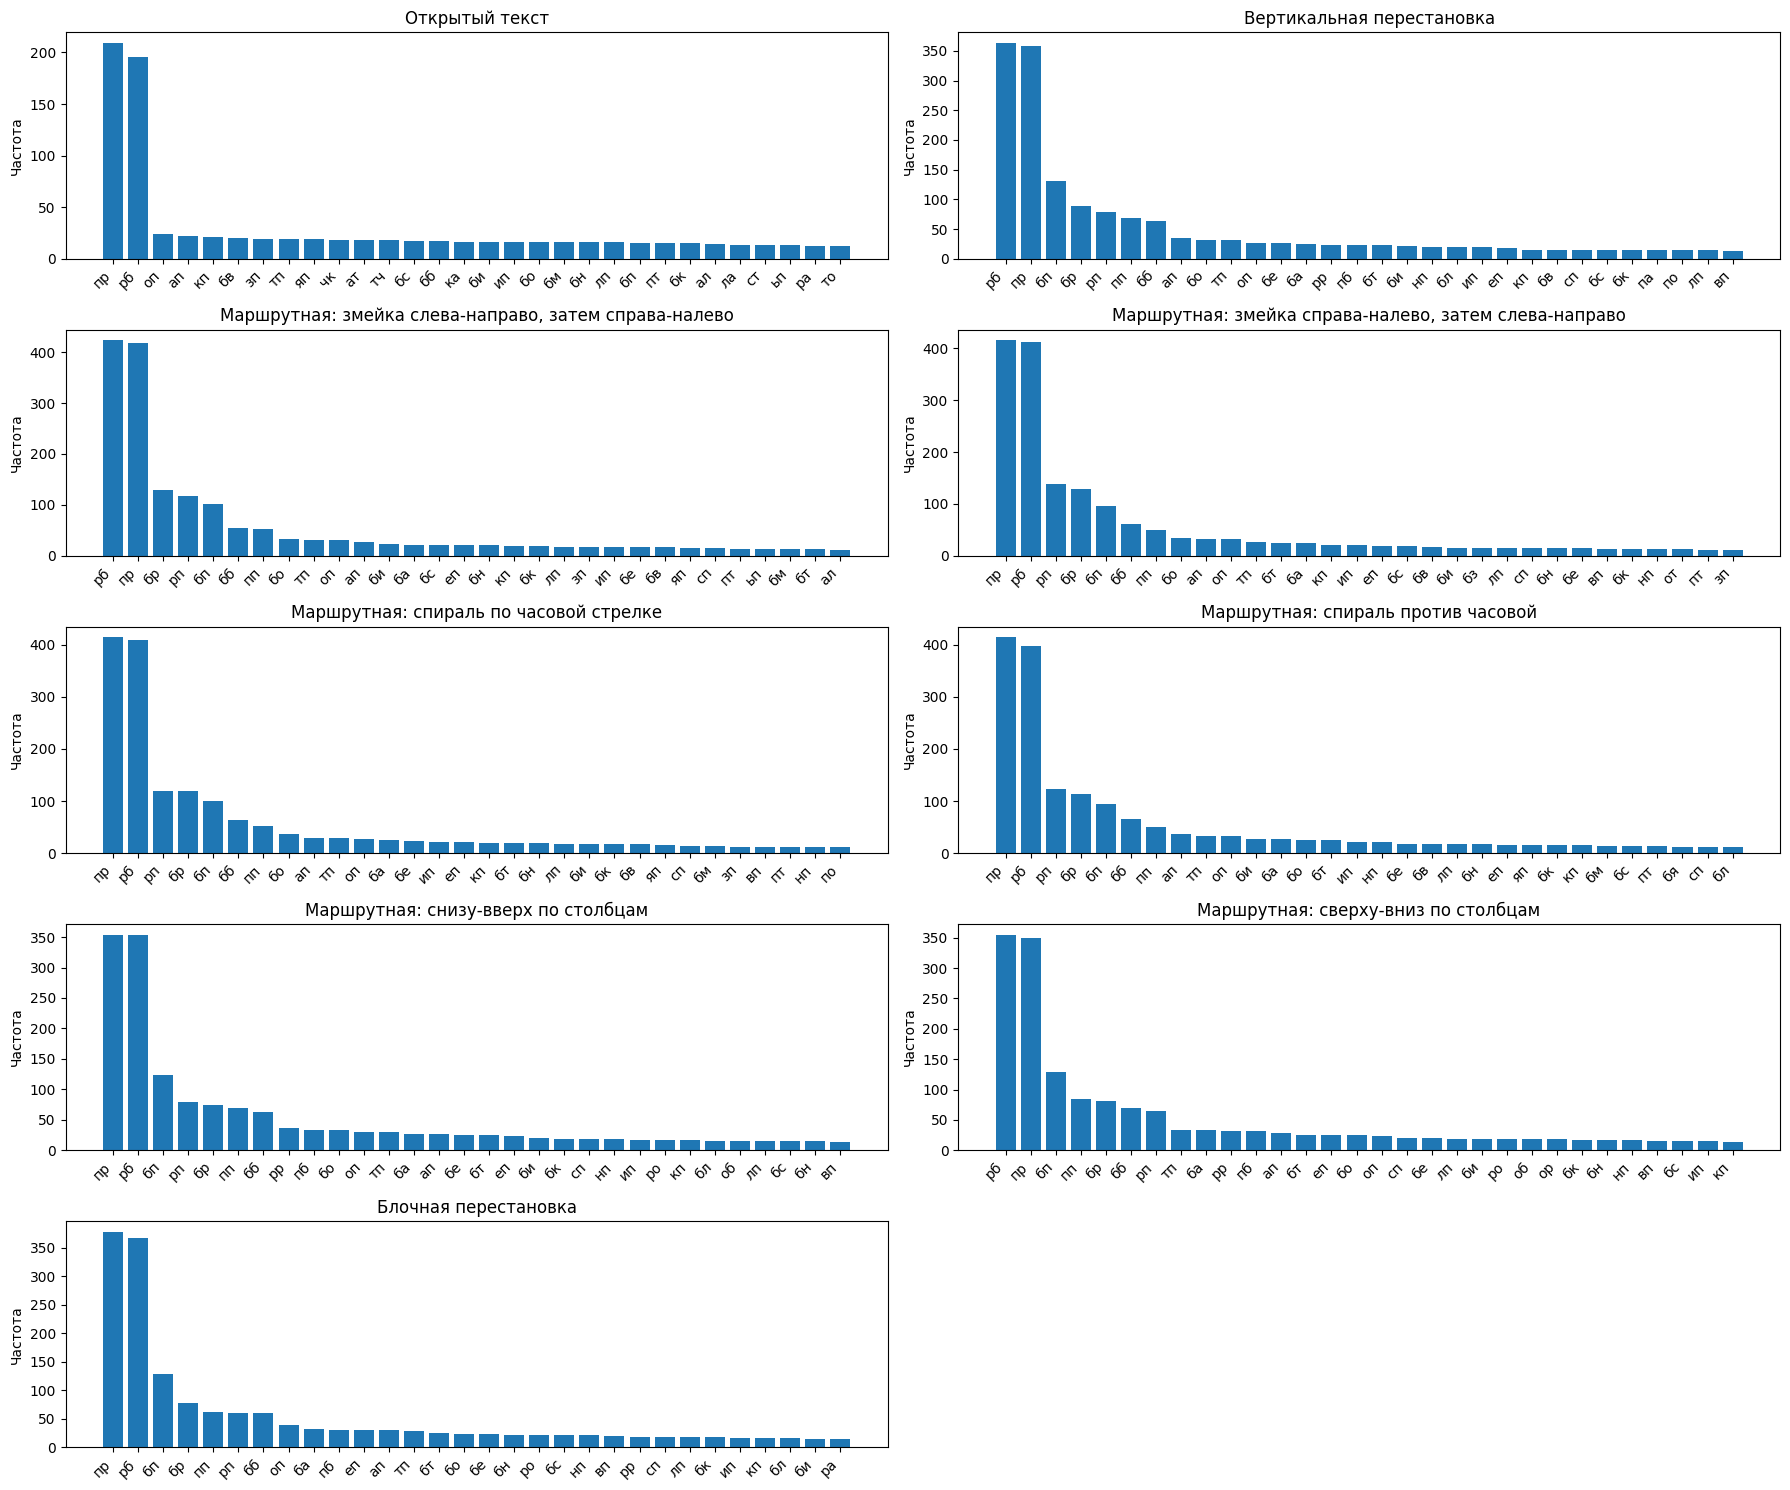

In [ ]:
from collections import Counter
import math
import matplotlib.pyplot as plt


def normalize_for_ngrams(text: str) -> str:
    """
    Нормализация под анализ:
    - к нижнему регистру
    - пробел -> 'прб'
    - ',' -> 'зпт'
    - '.' -> 'тчк'
    """
    text = text.lower()
    text = text.replace(" ", "прб").replace(",", "зпт").replace(".", "тчк")
    return text


def count_bigrams(text: str) -> Counter:
    text = normalize_for_ngrams(text)
    if len(text) < 2:
        return Counter()
    bigrams = [text[i: i + 2] for i in range(len(text) - 1)]
    return Counter(bigrams)


def plot_bigrams_on_ax(ax, counter: Counter, top_n: int, title: str):
    most_common = counter.most_common(top_n)
    if not most_common:
        ax.set_title(f"{title}\n(нет биграмм)")
        ax.axis("off")
        return

    labels = [b for b, _ in most_common]
    values = [c for _, c in most_common]

    ax.bar(range(len(labels)), values)
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.set_ylabel("Частота")
    ax.set_title(title)


def load_texts_from_file(path: str):
    """
    1-я непустая строка — открытый текст.
    Далее — шифртексты, по одному на строку.
    Пустые строки игнорируются.
    """
    with open(path, "r", encoding="utf-8") as f:
        lines = [line.rstrip("\n") for line in f]

    non_empty = [l for l in lines if l.strip() != ""]
    if not non_empty:
        raise ValueError("Файл пуст.")

    open_text = non_empty[0]
    cipher_texts = non_empty[1:]
    return open_text, cipher_texts


def main():
    path = "open_and_encrypted_text.txt"

    open_text, cipher_texts = load_texts_from_file(path)

    titles = [
        "Открытый текст",
        "Вертикальная перестановка",
        "Маршрутная: змейка слева-направо, затем справа-налево",
        "Маршрутная: змейка справа-налево, затем слева-направо",
        "Маршрутная: спираль по часовой стрелке",
        "Маршрутная: спираль против часовой",
        "Маршрутная: снизу-вверх по столбцам",
        "Маршрутная: сверху-вниз по столбцам",
        "Блочная перестановка",
    ]

    # собираем все тексты и подписи
    all_texts = [open_text] + cipher_texts
    n_plots = len(all_texts)

    cols = 2
    rows = math.ceil(n_plots / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(18, 3 * rows))
    # axes может быть 2D или 1D в зависимости от rows/cols
    axes = axes.ravel() if isinstance(axes, (list, tuple)) or hasattr(axes, "ravel") else [axes]

    for i, text in enumerate(all_texts):
        counter = count_bigrams(text)
        title = titles[i] if i < len(titles) else f"Текст {i}"
        plot_bigrams_on_ax(axes[i], counter, top_n=30, title=title)

    # оставшиеся пустые оси выключаем (если графиков меньше, чем ячеек)
    for j in range(n_plots, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()
